Importing Libraries

In [1]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

In [3]:
import os
import cv2
from PIL import Image

In [4]:
DATA_DIR = 'E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images/'
SIZE = 64
dataset = []
label = []

#E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images\Parasitized\C33P1thinF_IMG_20150619_114756a_cell_179.png

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

Train and Test Dataset

In [6]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [7]:
SIZE = (64,64)

In [8]:
trainDatagen = datagen.flow_from_directory(directory='E:\Thesis 4100\Malaria_Cell_Detection\Malaria_Detection_using_CNN\cell_images\cell_images',
                                           target_size=(SIZE),
                                           class_mode = 'binary',
                                           batch_size = 64,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [9]:
test_generator = ImageDataGenerator(rescale = 1/255)

In [10]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

NameError: name 'parasitized_images' is not defined

<Figure size 1440x864 with 0 Axes>

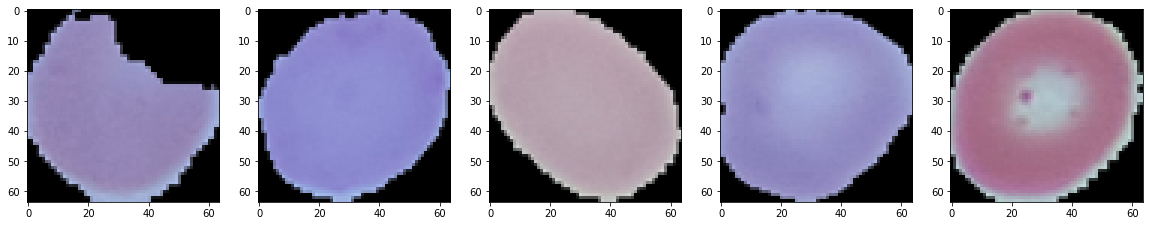

In [8]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(parasitized_images) + image_index])

In [9]:

classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))


classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))


classifier.add(Flatten())

classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))

classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))

classifier.add(Dense(activation = 'sigmoid', units=2))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0

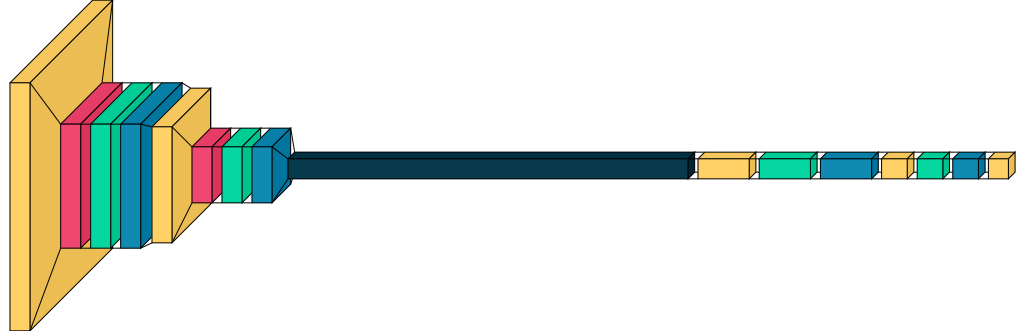

In [19]:
import visualkeras
visualkeras.layered_view(classifier,to_file='output.png').show()
visualkeras.layered_view(classifier)

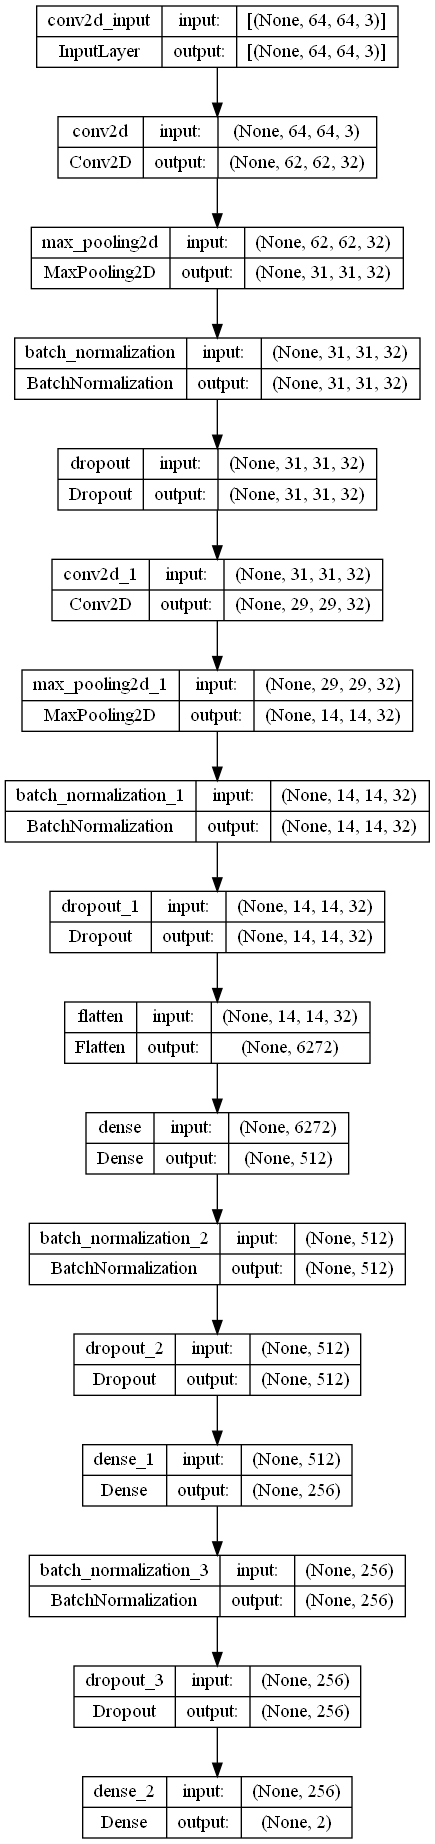

In [21]:
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
from keras.utils.vis_utils import plot_model
import pydot
import graphviz

In [10]:
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

In [12]:
history = classifier.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 50, 
                         validation_split = 0.1,
                         shuffle = False)

Epoch 1/50
311/311 - 147s - loss: 0.4956 - accuracy: 0.7856 - val_loss: 0.3941 - val_accuracy: 0.8707 - 147s/epoch - 472ms/step
Epoch 2/50
311/311 - 134s - loss: 0.2333 - accuracy: 0.9153 - val_loss: 0.2318 - val_accuracy: 0.9211 - 134s/epoch - 431ms/step
Epoch 3/50
311/311 - 137s - loss: 0.1924 - accuracy: 0.9306 - val_loss: 0.2122 - val_accuracy: 0.9338 - 137s/epoch - 441ms/step
Epoch 4/50
311/311 - 140s - loss: 0.1733 - accuracy: 0.9379 - val_loss: 0.1667 - val_accuracy: 0.9383 - 140s/epoch - 449ms/step
Epoch 5/50
311/311 - 122s - loss: 0.1565 - accuracy: 0.9441 - val_loss: 0.2388 - val_accuracy: 0.9025 - 122s/epoch - 393ms/step
Epoch 6/50
311/311 - 112s - loss: 0.1367 - accuracy: 0.9506 - val_loss: 0.1842 - val_accuracy: 0.9270 - 112s/epoch - 361ms/step
Epoch 7/50
311/311 - 111s - loss: 0.1221 - accuracy: 0.9572 - val_loss: 0.2074 - val_accuracy: 0.9270 - 111s/epoch - 358ms/step
Epoch 8/50
311/311 - 112s - loss: 0.1038 - accuracy: 0.9621 - val_loss: 0.2400 - val_accuracy: 0.9025 - 

KeyboardInterrupt: 

In [26]:
print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(np.array(X_test), np.array(y_test))[1]*100))

173/173 [==============================] - 8s 44ms/step - loss: 0.2698 - accuracy: 0.9478
Test_Accuracy: 94.78%


In [27]:
from tensorflow.keras.models import load_model

classifier.save('custom_cnn.h5')

In [ ]:
y_pred = classifier.predict(test_generator)

In [ ]:
plt.plot(classifier.history['loss'])

In [ ]:
classifier.history['val_loss']